In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

file1 = "../Data/Motor_Vehicle_Collisions_20250709.csv"
file2 = "../Data/nyc_mappluto_25v1_1_shp/MapPLUTO.shp"
data = pd.read_csv(file1)
nyc_map = gpd.read_file(file2)

data.columns

C:\Users\kdgki\AppData\Local\Temp\ipykernel_28188\2153896244.py:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file1)


Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [4]:
data['CRASH DATE'].max()

'12/31/2024'

In [3]:
df_clean = data.dropna(subset=['LONGITUDE', 'LATITUDE'])
geometry = [Point(xy) for xy in zip(df_clean['LONGITUDE'], df_clean['LATITUDE'])]
accidents = gpd.GeoDataFrame(df_clean, geometry=geometry, crs='EPSG:4326')
df = accidents.to_crs(nyc_map.crs)

In [4]:
df['geometry'].tail()

2189247    POINT (1000463.559 197040.675)
2189248    POINT (1022046.285 213822.838)
2189249    POINT (1025647.876 183024.542)
2189250    POINT (1025221.864 213535.067)
2189251    POINT (1048880.407 195773.234)
Name: geometry, dtype: geometry

# Mapping Accidents on NYC Map
The transparency of the dots are lowered so that the overlapped dots are differentiable through different color density.

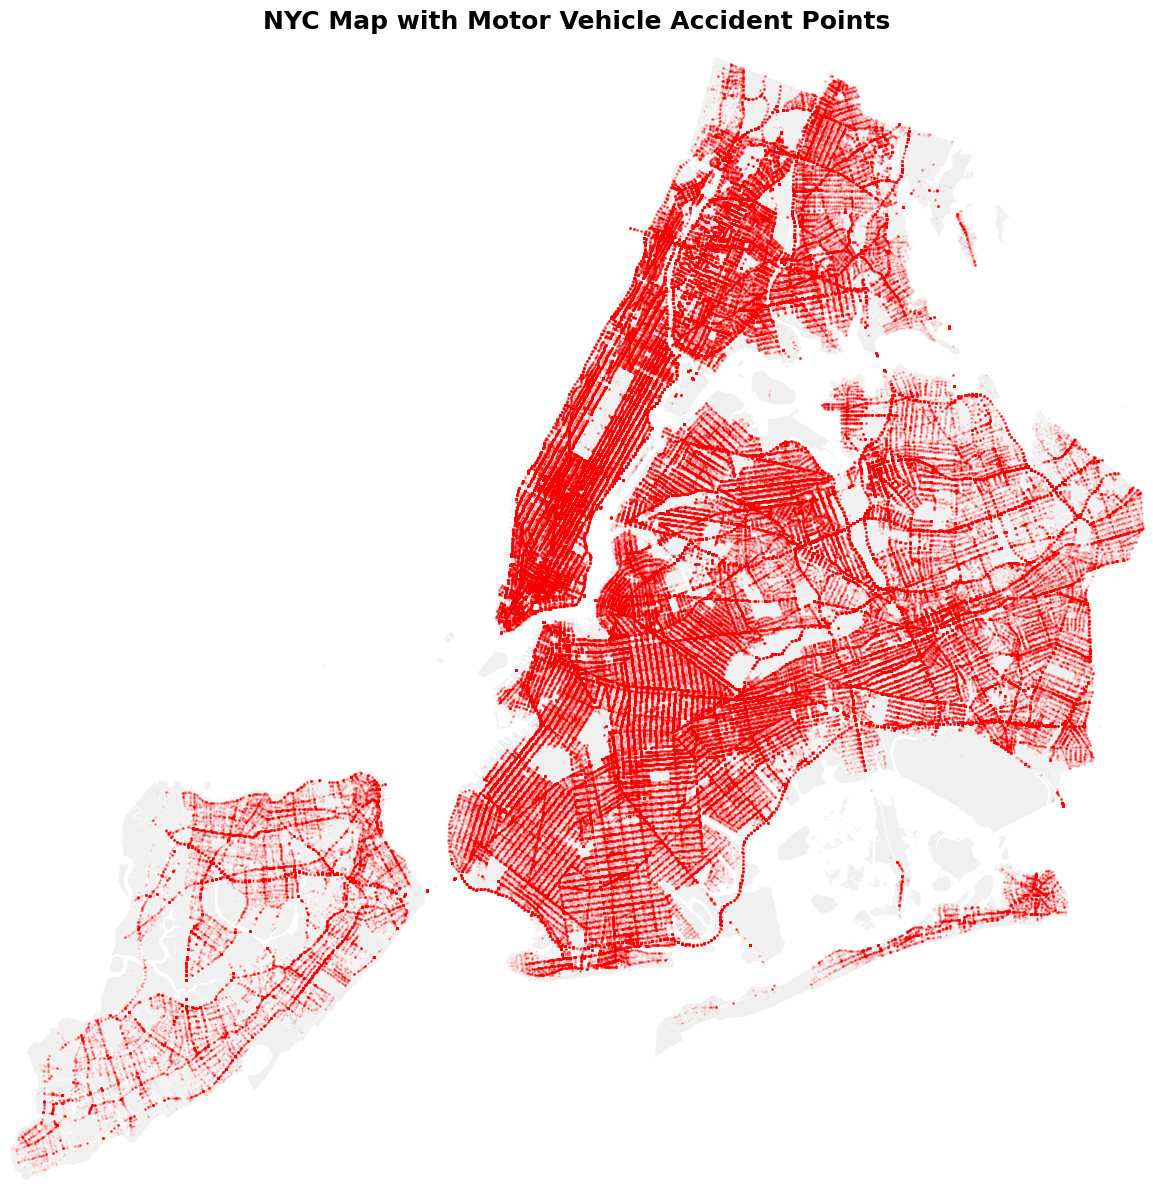

NYC Map: 856734 polygons
Accident Points: 1949163 locations
Map Bounds: [ 913128.92637062  120048.98595905 1067335.95135403  272811.18305349]
Points Bounds: [-23113980.71162023  -3017846.02740893  31130726.73250165
  21657710.19749959]


In [60]:
fig, ax = plt.subplots(figsize=(15, 12))

# First, plot the NYC map with more visible styling
nyc_map.plot(
    ax=ax, 
    color='#f0f0f0',  # Light grey background
    zorder=1
)

# Then plot the accident points with better visibility
df.plot(
    ax=ax, 
    color='#ff0000',  # Bright red
    markersize=0.6,  # Smaller points to avoid overwhelming the map
    alpha=0.05,  # Slight transparency to see map underneath
    zorder=2
)

# Set the plot bounds to match the NYC map extent
ax.set_xlim(nyc_map.total_bounds[0], nyc_map.total_bounds[2])
ax.set_ylim(nyc_map.total_bounds[1], nyc_map.total_bounds[3])

# Remove axes for cleaner look
ax.set_axis_off()

# Add title and adjust layout
plt.title("NYC Map with Motor Vehicle Accident Points", 
    fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()

# Display the plot
plt.show()

# Print some information about the datasets
print(f"NYC Map: {len(nyc_map)} polygons")
print(f"Accident Points: {len(df)} locations")
print(f"Map Bounds: {nyc_map.total_bounds}")
print(f"Points Bounds: {df.total_bounds}")

In [61]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'geometry'],
      dtype='object')

In [62]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['CRASH DATE'].min()

Timestamp('2012-07-01 00:00:00')

In [63]:
df_recent = df[df['CRASH DATE'] > "2021-01-01"]
df_recent['CRASH DATE'].max()

Timestamp('2025-07-05 00:00:00')

# Mapping Accidents 2021 and onward
There are too many data points, analysis data reduced to 2021 and onward

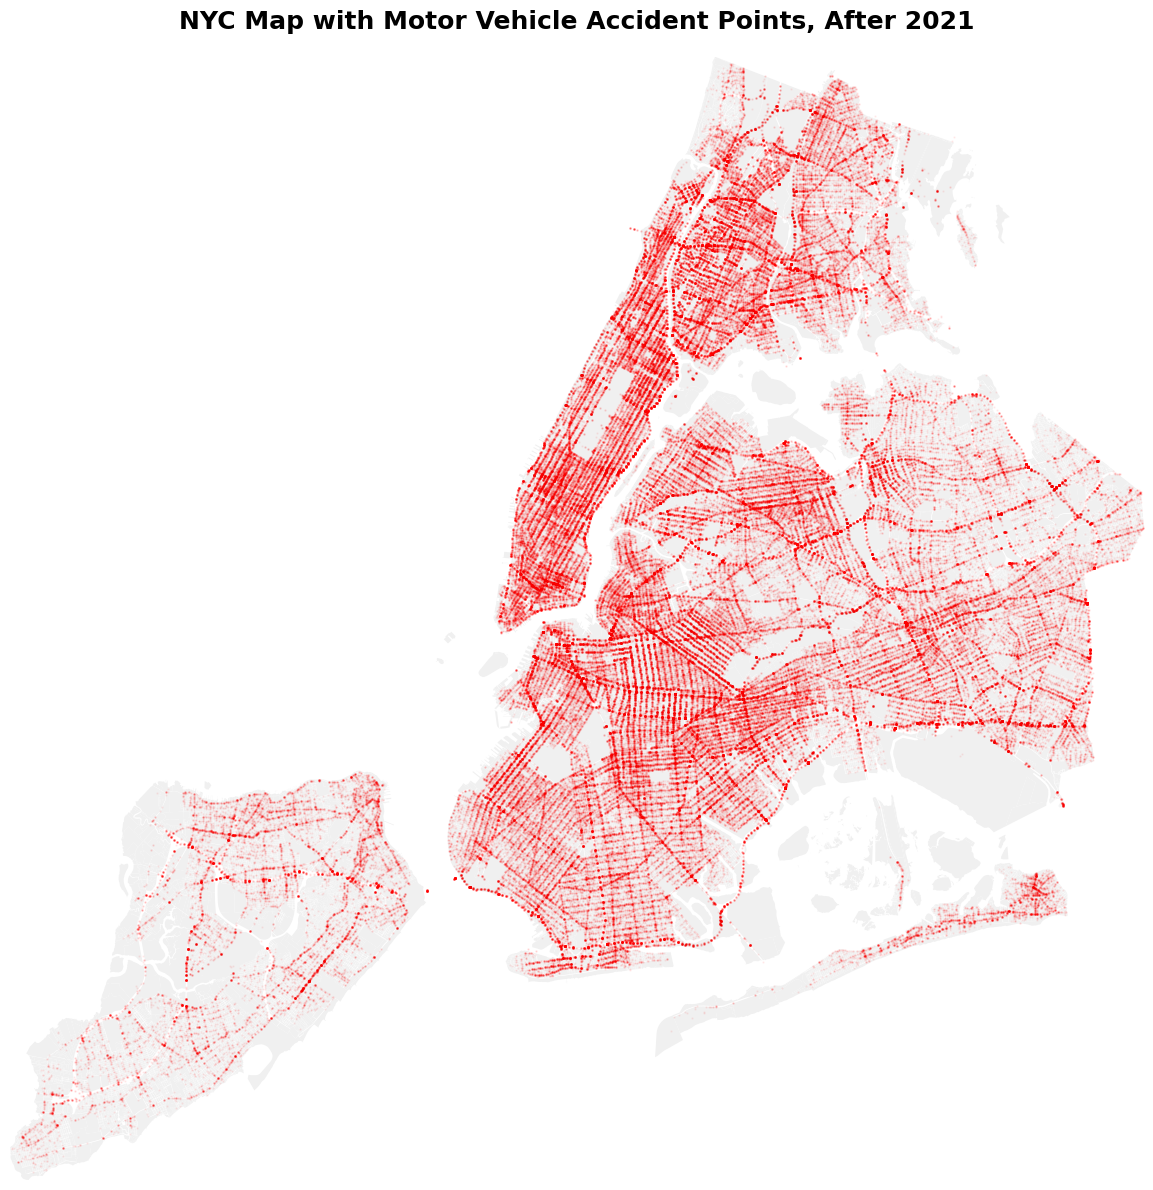

NYC Map: 856734 polygons
Accident Points: 1949163 locations
Map Bounds: [ 913128.92637062  120048.98595905 1067335.95135403  272811.18305349]
Points Bounds: [-23113980.71162023  -3017846.02740893  31130726.73250165
  21657710.19749959]


In [64]:
fig, ax = plt.subplots(figsize=(15, 12))

# First, plot the NYC map with more visible styling
nyc_map.plot(
    ax=ax, 
    color='#f0f0f0',  # Light grey background
    zorder=1
)

# Then plot the accident points with better visibility
df_recent.plot(
    ax=ax, 
    color='#ff0000',  # Bright red
    markersize=0.6,  # Smaller points to avoid overwhelming the map
    alpha=0.05,  # Slight transparency to see map underneath
    zorder=2
)

# Set the plot bounds to match the NYC map extent
ax.set_xlim(nyc_map.total_bounds[0], nyc_map.total_bounds[2])
ax.set_ylim(nyc_map.total_bounds[1], nyc_map.total_bounds[3])

# Remove axes for cleaner look
ax.set_axis_off()

# Add title and adjust layout
plt.title("NYC Map with Motor Vehicle Accident Points, After 2021", 
    fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()

# Display the plot
plt.show()

# Print some information about the datasets
print(f"NYC Map: {len(nyc_map)} polygons")
print(f"Accident Points: {len(df)} locations")
print(f"Map Bounds: {nyc_map.total_bounds}")
print(f"Points Bounds: {df.total_bounds}")

# Cycle Accident Analysis

In [65]:
df_cycle = df[(df['CRASH DATE'] > "2021-01-01") & (df['NUMBER OF CYCLIST INJURED'] > 0)]


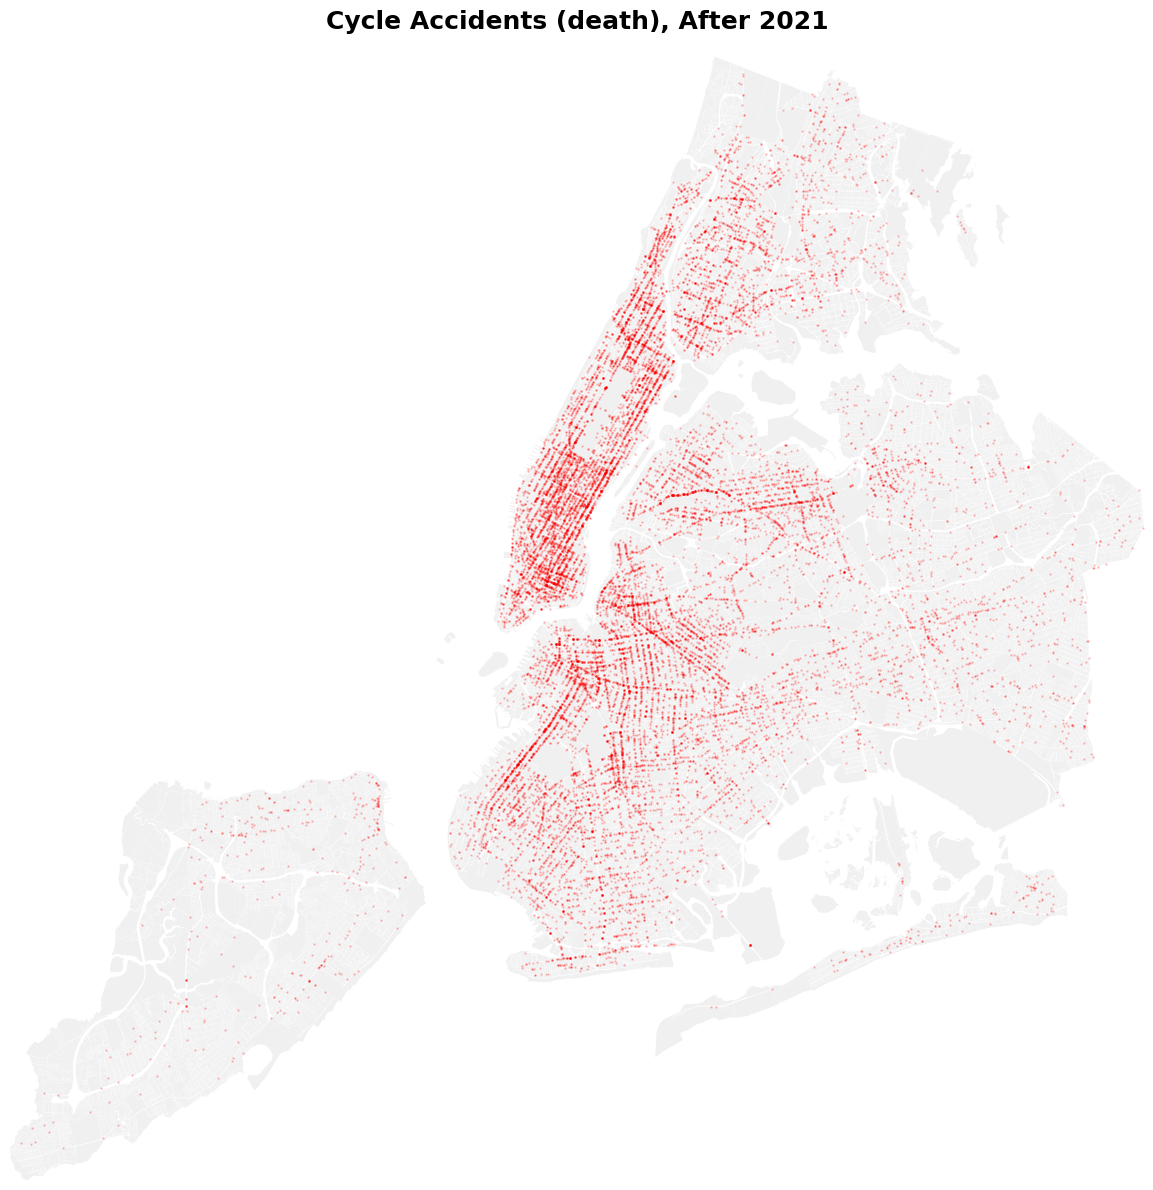

NYC Map: 856734 polygons
Accident Points: 1949163 locations
Map Bounds: [ 913128.92637062  120048.98595905 1067335.95135403  272811.18305349]
Points Bounds: [-23113980.71162023  -3017846.02740893  31130726.73250165
  21657710.19749959]


In [66]:

fig, ax = plt.subplots(figsize=(15, 12))

# First, plot the NYC map with more visible styling
nyc_map.plot(
    ax=ax, 
    color='#f0f0f0',  # Light grey background
    zorder=1
)

# Then plot the accident points with better visibility
df_cycle.plot(
    ax=ax, 
    color='#ff0000',  # Bright red
    markersize=0.6,  # Smaller points to avoid overwhelming the map
    alpha=0.2,  # Slight transparency to see map underneath
    zorder=2
)

# Set the plot bounds to match the NYC map extent
ax.set_xlim(nyc_map.total_bounds[0], nyc_map.total_bounds[2])
ax.set_ylim(nyc_map.total_bounds[1], nyc_map.total_bounds[3])

# Remove axes for cleaner look
ax.set_axis_off()

# Add title and adjust layout
plt.title("Cycle Accidents (death), After 2021", 
    fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()

# Display the plot
plt.show()

# Print some information about the datasets
print(f"NYC Map: {len(nyc_map)} polygons")
print(f"Accident Points: {len(df)} locations")
print(f"Map Bounds: {nyc_map.total_bounds}")
print(f"Points Bounds: {df.total_bounds}")

# Accident Date Analysis

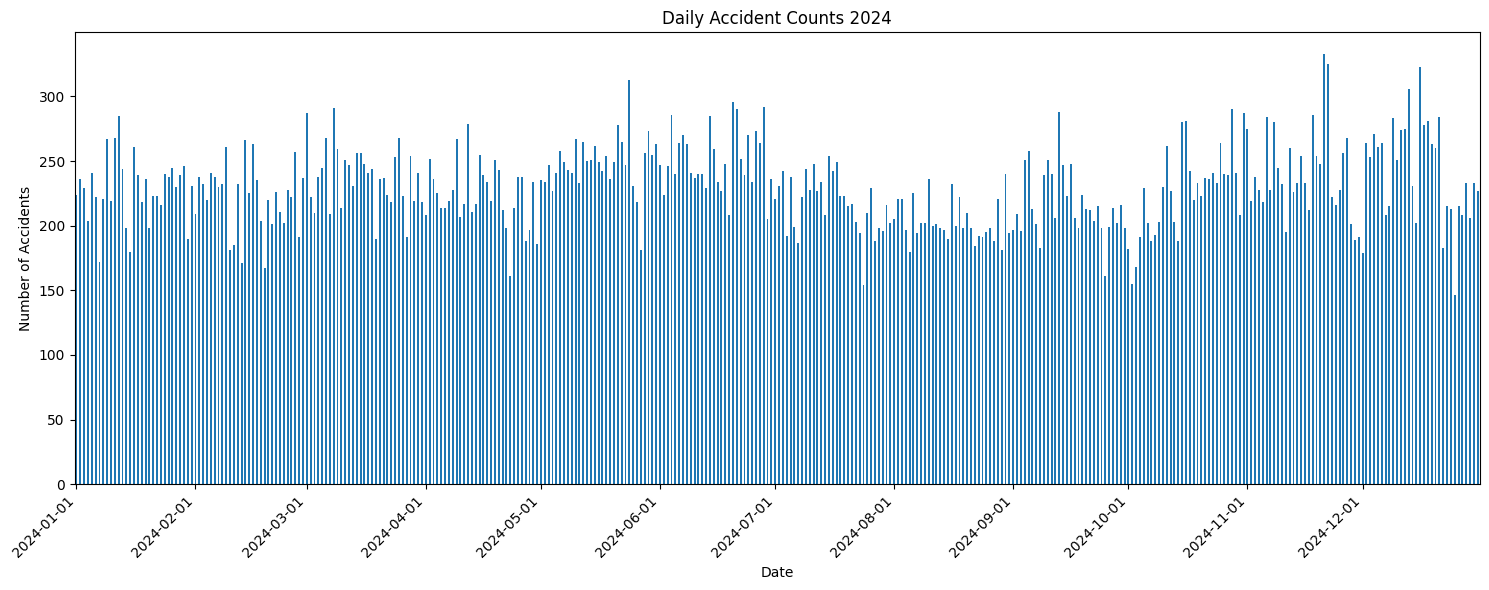

In [67]:
mask = (df['CRASH DATE'] >= '2024-01-01') & (df['CRASH DATE'] <= '2024-12-31')
df_filtered = df[mask]

plt.figure(figsize=(15, 6))
df_filtered['CRASH DATE'].dt.date.value_counts().sort_index().plot(kind='bar')

monthly_ticks = pd.date_range(start='2024-01-01', end='2024-12-01', freq='MS').date
monthly_labels = [date.strftime('%Y-%m-%d') for date in monthly_ticks]

date_counts = df_filtered['CRASH DATE'].dt.date.value_counts().sort_index()
xtick_positions = [i for i, date in enumerate(date_counts.index) if date in monthly_ticks]

plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.title('Daily Accident Counts 2024')
plt.xticks(ticks=xtick_positions, labels=monthly_labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [69]:
df['CRASH DATE'].value_counts().max

<bound method Series.max of CRASH DATE
2018-11-15    993
2014-01-21    959
2017-12-15    951
2017-05-19    915
2017-05-18    856
             ... 
2020-04-23     97
2020-04-12     97
2020-04-09     96
2020-04-19     92
2020-04-05     85
Name: count, Length: 4753, dtype: int64>

Hypothesis: expectation of higher accidents count for special days such as Christmas or Independence day, but there seem to be no such correlation.
However the accident count differences between different times exists, where maximum accident count for a single day is 993 (2018-11-15), mininum of 85 (2020-04-05)

In [10]:
df['TIME'] = pd.to_datetime(df['CRASH TIME'])
df['HOUR'] = pd.to_datetime(df['CRASH TIME']).dt.hour

C:\Users\kdgki\AppData\Local\Temp\ipykernel_19896\1367744004.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TIME'] = pd.to_datetime(df['CRASH TIME'])
C:\Users\kdgki\AppData\Local\Temp\ipykernel_19896\1367744004.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['HOUR'] = pd.to_datetime(df['CRASH TIME']).dt.hour


([<matplotlib.axis.XTick at 0x231845de930>,
 [Text(0, 0, '0'),
  Text(6, 0, '6'),
  Text(12, 0, '12'),
  Text(18, 0, '18'),
  Text(24, 0, '24')])

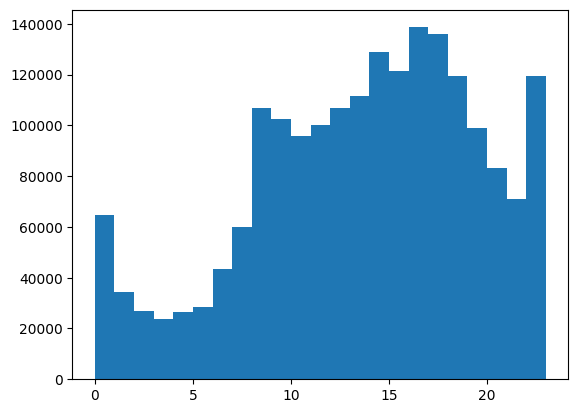

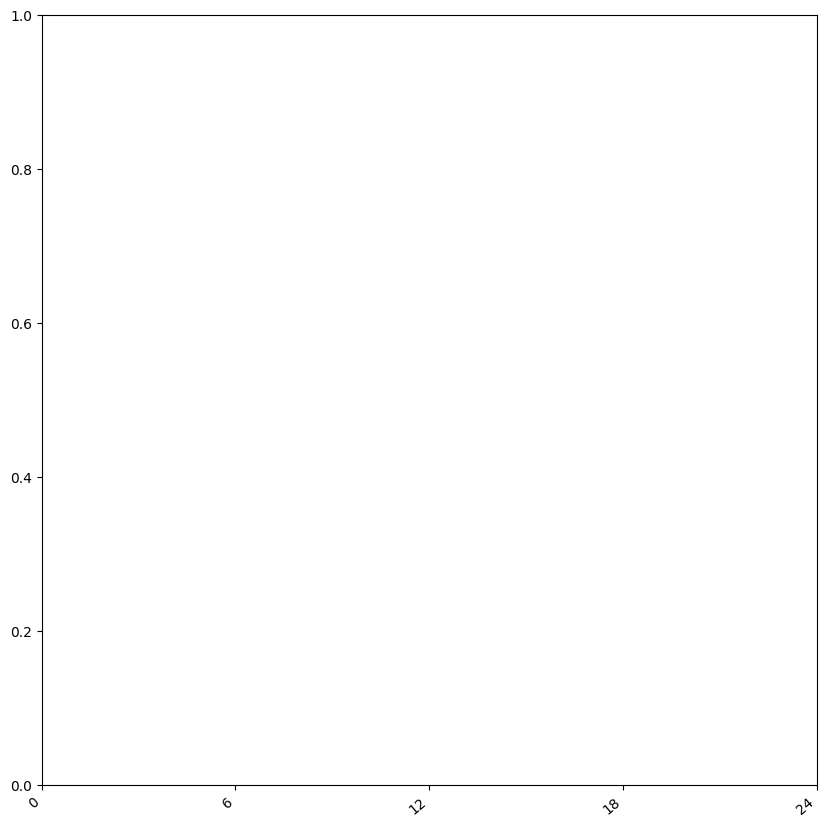

In [ ]:
plt.hist(df['HOUR'], bins=23)
plt.xticks([0,6,12,18,24], rotation=40, ha='right')

In [3]:
df.columns

NameError: name 'df' is not defined

In [14]:
df['CRASH DATE'].min

NameError: name 'df' is not defined

In [16]:
df[['HOUR']].to_json(r'C:\Users\kdgki\Desktop\MSCDP\Computational_Design_Workflow\CDW_Assignments\Assignment4_d3js\accidents_hour.json', orient='records', indent=1)

In [6]:
data['pedestrian'] = data['NUMBER OF PEDESTRIANS INJURED'] + data['NUMBER OF PEDESTRIANS KILLED']
data['cyclist'] = data['NUMBER OF CYCLIST INJURED'] + data['NUMBER OF CYCLIST KILLED']
data['motorist'] = data['NUMBER OF MOTORIST INJURED'] + data['NUMBER OF MOTORIST KILLED']

In [10]:
new_data = data[['CRASH TIME', 'pedestrian', 'cyclist', 'motorist']]
new_data = new_data[new_data[['pedestrian', 'cyclist', 'motorist']].sum(axis=1) != 0]
new_data.rename(columns={'pedestrian':'victim-p', 'cyclist':'victim-c', 'motorist':'victim-m'}, inplace=True)
new_data['injurer-p'] = 0
new_data['injurer-c'] = 0
new_data['injurer-m'] = 0

In [11]:
data.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'pedestrian', 'cyclist', 'motorist'],
      dtype='object')

In [12]:
import numpy as np

new_data.loc[(new_data[['victim-p', 'victim-c']].sum(axis=1) == 0), 'injurer-m'] = new_data['victim-m']
condition = (new_data[['victim-p', 'victim-c']].sum(axis=1) != 0)

# Step 2: Get all indices that satisfy the condition
qualified_indices = new_data[condition].index

# Step 3: Randomly choose 5% of them for 'injurer-c'
sample_size = int(0.05 * len(qualified_indices))
injurer_c_indices = np.random.choice(qualified_indices, size=sample_size, replace=False)

# Step 4: Remaining 95% go to 'injurer-m'
injurer_m_indices = qualified_indices.difference(injurer_c_indices)

# Step 5: Assign values
sum_victims = new_data[['victim-p', 'victim-c']].sum(axis=1)

new_data.loc[injurer_m_indices, 'injurer-m'] = sum_victims.loc[injurer_m_indices]
new_data.loc[injurer_c_indices, 'injurer-c'] = sum_victims.loc[injurer_c_indices]


In [15]:
new_data['HOUR'] = pd.to_datetime(new_data['CRASH TIME']).dt.hour
new_data['time_quarter'] = (new_data['HOUR'] // 6) + 1
new_data.to_csv('new_data.csv')

C:\Users\kdgki\AppData\Local\Temp\ipykernel_45380\3213987902.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_data['HOUR'] = pd.to_datetime(new_data['CRASH TIME']).dt.hour


In [17]:
data_hour_batched = new_data.groupby('time_quarter')[['victim-p','victim-c','victim-m','injurer-p','injurer-c','injurer-m']].sum()
data_hour_batched.to_csv('data_hour_batched.csv')

The number of accidents are lowest from 1 AM to 5 AM, highest from 2 PM to 5 PM, for comparison between 2 rush hour, there are more accidents in the AM peak compared to PM peak.